[Ataque de Tiburones Global](https://www.kaggle.com/datasets/gauravkumar2525/shark-attacks/data)

Estudiar los ataques de tiburones a nivel mundial para entender cuándo, dónde y por qué ocurren, identificando las principales causas, especies y actividades humanas relacionadas, con el fin de reducir riesgos y fomentar una convivencia segura con el medio marino.

In [1]:
# Importo las librerías que voy a usar
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Para encontrar el directorio del lugar donde me encuentro
os.getcwd()

'c:\\Users\\mikel\\Desktop\\DataScience\\PROYECTO-Ataques-de-Tiburon-EDA_'

In [2]:
# Visulizar los archivos existentes en la carpeta donde me encuentro
print("Archivos en la carpeta actual:")
print(os.listdir())

Archivos en la carpeta actual:
['.git', '0-Enunciado_EDA.ipynb', 'global_shark_attacks.csv', 'global_shark_attacks_nuevo.csv', 'Memoria.ipynb', 'Proyecto EDA global_shark_attacks.ipynb', 'README.md', 'Utils.py']


In [3]:
# Leer csv como DataFrame

df = pd.read_csv("global_shark_attacks.csv")

df.head

<bound method NDFrame.head of             date    year          type       country                area  \
0     2023-05-13  2023.0    Unprovoked     AUSTRALIA     South Australia   
1     2023-04-29  2023.0    Unprovoked     AUSTRALIA   Western Australia   
2     2022-10-07  2022.0    Unprovoked     AUSTRALIA  Western  Australia   
3     2021-10-04  2021.0    Unprovoked           USA             Florida   
4     2021-10-03  2021.0    Unprovoked           USA             Florida   
...          ...     ...           ...           ...                 ...   
6885         NaN     NaN  Sea Disaster        GREECE        Off Thessaly   
6886         NaN     NaN    Unprovoked     INDONESIA       Riau Province   
6887         NaN     NaN    Unprovoked          IRAQ              Basrah   
6888         NaN     NaN    Unprovoked  SOUTH AFRICA       KwaZulu-Natal   
6889         NaN     NaN    Unprovoked     AUSTRALIA   Western Australia   

                                               location  

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6890 entries, 0 to 6889
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       6587 non-null   object 
 1   year       6758 non-null   float64
 2   type       6871 non-null   object 
 3   country    6839 non-null   object 
 4   area       6409 non-null   object 
 5   location   6325 non-null   object 
 6   activity   6304 non-null   object 
 7   name       6670 non-null   object 
 8   sex        6318 non-null   object 
 9   age        3903 non-null   object 
 10  fatal_y_n  6890 non-null   object 
 11  time       3372 non-null   object 
 12  species    3772 non-null   object 
dtypes: float64(1), object(12)
memory usage: 699.9+ KB


In [5]:
df = df.drop([
    "species",
    "age",
    "time",
    "name"], axis=1, errors='ignore')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6890 entries, 0 to 6889
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       6587 non-null   object 
 1   year       6758 non-null   float64
 2   type       6871 non-null   object 
 3   country    6839 non-null   object 
 4   area       6409 non-null   object 
 5   location   6325 non-null   object 
 6   activity   6304 non-null   object 
 7   sex        6318 non-null   object 
 8   fatal_y_n  6890 non-null   object 
dtypes: float64(1), object(8)
memory usage: 484.6+ KB


In [7]:
#  Guardar DataFrame en formato csv
df.to_csv("global_shark_attacks_nuevo.csv", index=False, encoding='utf-8-sig')

df.head

<bound method NDFrame.head of             date    year          type       country                area  \
0     2023-05-13  2023.0    Unprovoked     AUSTRALIA     South Australia   
1     2023-04-29  2023.0    Unprovoked     AUSTRALIA   Western Australia   
2     2022-10-07  2022.0    Unprovoked     AUSTRALIA  Western  Australia   
3     2021-10-04  2021.0    Unprovoked           USA             Florida   
4     2021-10-03  2021.0    Unprovoked           USA             Florida   
...          ...     ...           ...           ...                 ...   
6885         NaN     NaN  Sea Disaster        GREECE        Off Thessaly   
6886         NaN     NaN    Unprovoked     INDONESIA       Riau Province   
6887         NaN     NaN    Unprovoked          IRAQ              Basrah   
6888         NaN     NaN    Unprovoked  SOUTH AFRICA       KwaZulu-Natal   
6889         NaN     NaN    Unprovoked     AUSTRALIA   Western Australia   

                                               location  

In [8]:
## LIMPIEZA DE COLUMNAS TEMPORALES

# Convertir fechas erroneas a NaT (para desconsiderarlas sin que se rompa el programa)
df['date'] = pd.to_datetime(df['date'], errors = 'coerce') 

# Si la columna de "year" está vacía, extrae la información de la columna "date" y rellena la columna "year" 
df['year'] = df['year'].fillna(df['date'].dt.year) 

# Se eliminan las filas sin fecha ni año (no aportan información temporal)
df = df.dropna(subset = ['year'])

 # Asegurarse de que "year" sea un entero y no float 
df['year'] = df['year'].astype(int) 

# Reemplazar nulos en columnas categóricas con "Unknown"
cols_categoricas = ['type', 'country', 'area', 'location', 'activity', 'sex'] 

df[cols_categoricas] = df[cols_categoricas].fillna('Unknown')

C:\Users\mikel\AppData\Local\Temp\ipykernel_14768\2214105075.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].astype(int)
C:\Users\mikel\AppData\Local\Temp\ipykernel_14768\2214105075.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols_categoricas] = df[cols_categoricas].fillna('Unknown')


In [9]:
## LIMPIEZA DE 'fatal_y_n' # Pasa todas las letras "y" e "n" a mayúsculas .str.upper()

 # Elimina espacios en blanco al principio y al final del texto str.strip() 
df['fatal_y_n'] = df['fatal_y_n'].str.upper().str.strip() 

# "Y" o "N" limpios, esta línea los traduce
df['fatal_y_n'] = df['fatal_y_n'].replace({'Y': 'Fatal', 'N': 'Non-fatal'})

C:\Users\mikel\AppData\Local\Temp\ipykernel_14768\83475118.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fatal_y_n'] = df['fatal_y_n'].str.upper().str.strip()
C:\Users\mikel\AppData\Local\Temp\ipykernel_14768\83475118.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fatal_y_n'] = df['fatal_y_n'].replace({'Y': 'Fatal', 'N': 'Non-fatal'})


In [10]:
## NORMALIZAR TEXTO 

# (al usar .srt.title() -> solo la primera letra de toda la frase se pone en mayúscula, el resto en minúscula)
df['country'] = df['country'].str.title()

df['area'] = df['area'].str.title() 

# (al usar capitalize() -> solo la primera letra de la palabra se pone en mayuscula, el resto en minúscula) 
df['activity'] = df['activity'].str.capitalize() 

C:\Users\mikel\AppData\Local\Temp\ipykernel_14768\952797220.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'] = df['country'].str.title()
C:\Users\mikel\AppData\Local\Temp\ipykernel_14768\952797220.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area'] = df['area'].str.title()
C:\Users\mikel\AppData\Local\Temp\ipykernel_14768\952797220.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [11]:

# REVISIÓN FINAL 

# # Comprobar si quedan valores nulos
print("Valores nulos por columna:\n", df.isnull().sum())

# df.sample() para coger una muestra del dataset limpio (en este caso: 20 filas aleatorias y se comprueba que el dataset esta limpio) 
print("Ejemplo de datos limpios:\n", df.sample(20)) 

# Guardar el dataset limpio df.to_csv("global_shark_attacks_nuevo.csv", index=False) 
print("Dataset limpio guardado como 'global_shark_attacks_nuevo.csv'")

Valores nulos por columna:
 date         183
year           0
type           0
country        0
area           0
location       0
activity       0
sex            0
fatal_y_n      0
dtype: int64
Ejemplo de datos limpios:
            date  year        type           country  \
5690 2017-09-25  2017  Unprovoked         Australia   
5304 1973-06-13  1973  Unprovoked         Hong Kong   
6507 1996-07-04  1996  Unprovoked           Bahamas   
6139 1864-05-01  1864  Unprovoked         Mauritius   
2826 1988-07-19  1988  Unprovoked           Bahamas   
1930 1865-09-02  1865  Unprovoked               Usa   
6856 1911-04-08  1911  Watercraft       New Zealand   
572  2008-06-26  2008  Unprovoked      South Africa   
4733 2007-11-18  2007    Provoked         Australia   
2218 2022-04-09  2022    Provoked               Usa   
3390 1907-10-12  1907     Invalid             Haiti   
5383 1913-01-01  1913  Unprovoked         Australia   
6508 1996-04-25  1996  Unprovoked         Australia   
37   2015

In [12]:
# Información del nuevo DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6760 entries, 0 to 6884
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       6577 non-null   datetime64[ns]
 1   year       6760 non-null   int64         
 2   type       6760 non-null   object        
 3   country    6760 non-null   object        
 4   area       6760 non-null   object        
 5   location   6760 non-null   object        
 6   activity   6760 non-null   object        
 7   sex        6760 non-null   object        
 8   fatal_y_n  6760 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 528.1+ KB


## Hipotesis

De 17 columnas que tiene el dataset me he quedado con 10 columnas, que son las que me he basado para plantear las hipotesis. Estas son las hipotesis:

1. Los ataques de tiburón han aumentado en las últimas décadas.
2. El surf y la natación muestran una incidencia de ataques superior a la de otras actividades. 
3. Los ataques afectan mayoritariamente a hombres. 
4. Las actividades de buceo o pesca submarina tienen una mayor tasa de mortalidad. 
5. En australia los ataques fatales son más frecuentes que en lo demas paises.

In [13]:
df.shape

(6760, 9)

In [14]:
df.describe(include='all')

,date,year,type,country,area,location,activity,sex,fatal_y_n
count,6577,6760.000000,6760,6760,6760,6760,6760,6760,6760
unique,NaN,NaN,12,202,840,4368,1484,7,7
top,NaN,NaN,Unprovoked,Usa,Florida,Unknown,Surfing,M,Non-fatal
freq,NaN,NaN,4955,2505,1166,529,1111,5437,4739
mean,1973-07-24 03:01:17.178044704,1970.922781,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1703-03-26 00:00:00,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1951-10-05 00:00:00,1950.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1988-02-15 00:00:00,1986.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2009-09-02 00:00:00,2009.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2023-08-16 00:00:00,2023.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Mostrar todas las filas en consola 
pd.set_option('display.max_rows', None)

# Agrupar y contar sin convertir a DataFrame
ataques_por_año = df.groupby('year').size()

# Ordenar por año y mostrar
ataques_por_año = ataques_por_año.sort_index()
print(ataques_por_año)


year
1         1
1000      1
1500      1
1518      1
1543      1
1554      1
1555      1
1580      1
1595      1
1617      1
1637      1
1638      1
1640      1
1642      2
1700      3
1703      1
1721      1
1723      1
1733      1
1738      1
1742      1
1748      1
1749      1
1751      1
1753      1
1755      1
1758      1
1764      1
1767      1
1771      1
1776      2
1779      1
1780      1
1783      1
1784      1
1785      1
1786      1
1787      1
1788      1
1791      1
1792      1
1797      1
1800      1
1801      1
1802      1
1803      2
1804      1
1805      1
1807      1
1808      3
1810      1
1811      1
1812      1
1815      1
1816      1
1817      4
1818      1
1819      1
1822      1
1823      1
1825      2
1826      5
1827      3
1828      2
1829      3
1830      4
1831      2
1832      2
1834      1
1835      2
1836      3
1837      4
1839      4
1840      5
1841      1
1842      4
1844      4
1845      6
1846      3
1847      9
1848      4
1849      7
1850      2

In [16]:
# Filtrar los registros a partir de 1801 en adelante
df_filtrado = df[df['year'] >= 1800]

# Agrupar y contar ataques por año
ataques_por_año = df_filtrado.groupby('year').size().sort_index()

# Mostrar todos los resultados
pd.set_option('display.max_rows', None)
print(ataques_por_año)

year
1800      1
1801      1
1802      1
1803      2
1804      1
1805      1
1807      1
1808      3
1810      1
1811      1
1812      1
1815      1
1816      1
1817      4
1818      1
1819      1
1822      1
1823      1
1825      2
1826      5
1827      3
1828      2
1829      3
1830      4
1831      2
1832      2
1834      1
1835      2
1836      3
1837      4
1839      4
1840      5
1841      1
1842      4
1844      4
1845      6
1846      3
1847      9
1848      4
1849      7
1850      2
1851      3
1852     10
1853      8
1855      7
1856      4
1857      1
1858      6
1859      1
1860      7
1861      5
1862     12
1863     11
1864     14
1865      4
1866      2
1867      5
1868      6
1869      2
1870      8
1871      9
1872      8
1873      4
1874     12
1875      5
1876      9
1877     14
1878     13
1879      8
1880     15
1881      9
1882     12
1883     13
1884      7
1885      9
1886     16
1887     13
1888     15
1889      9
1890     17
1891      9
1892     11
1893     13

In [ ]:

# Asegurarse de que 'year' sea numérico

df['year'] = pd.to_numeric(df['year'], errors='coerce')


# Crear la columna 'decada' directamente en el df original

df['decada'] = (df['year'] // 10) * 10


df_filtrado = df[df['year'] >= 1800].copy()

# Comprobación: ver si existe la columna
print("Columnas disponibles:", df_filtrado.columns)


# Agrupar por década y contar ataques

ataques_por_decada = (df_filtrado.groupby('decada').size().reset_index(name='n_ataques').sort_values('decada'))


#  Mostrar el DataFrame final

print("\nAtaques por década:")
print(ataques_por_decada.head(10))

C:\Users\mikel\AppData\Local\Temp\ipykernel_14768\220722756.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = pd.to_numeric(df['year'], errors='coerce')
C:\Users\mikel\AppData\Local\Temp\ipykernel_14768\220722756.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['decada'] = (df['year'] // 10) * 10


Columnas disponibles: Index(['date', 'year', 'type', 'country', 'area', 'location', 'activity',
       'sex', 'fatal_y_n', 'decada'],
      dtype='object')

Ataques por década:
   decada  n_ataques
0    1800         11
1    1810         11
2    1820         17
3    1830         22
4    1840         43
5    1850         42
6    1860         68
7    1870         90
8    1880        118
9    1890        150


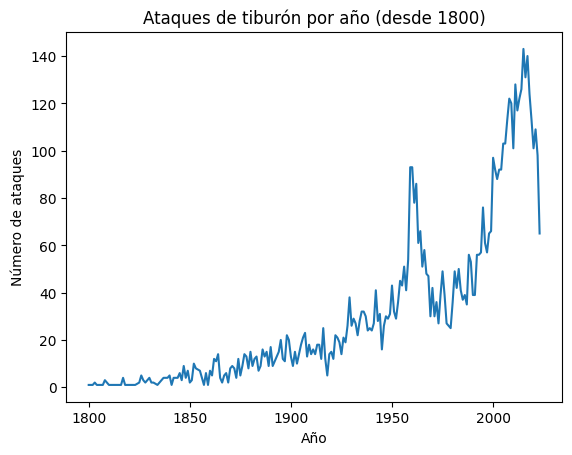

In [18]:
plt.plot(ataques_por_año.index, ataques_por_año.values)
plt.title('Ataques de tiburón por año (desde 1800)')
plt.xlabel('Año')
plt.ylabel('Número de ataques')
plt.show()

C:\Users\mikel\AppData\Local\Temp\ipykernel_14768\942031605.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_actividades.index, x=top_actividades.values, palette='crest')


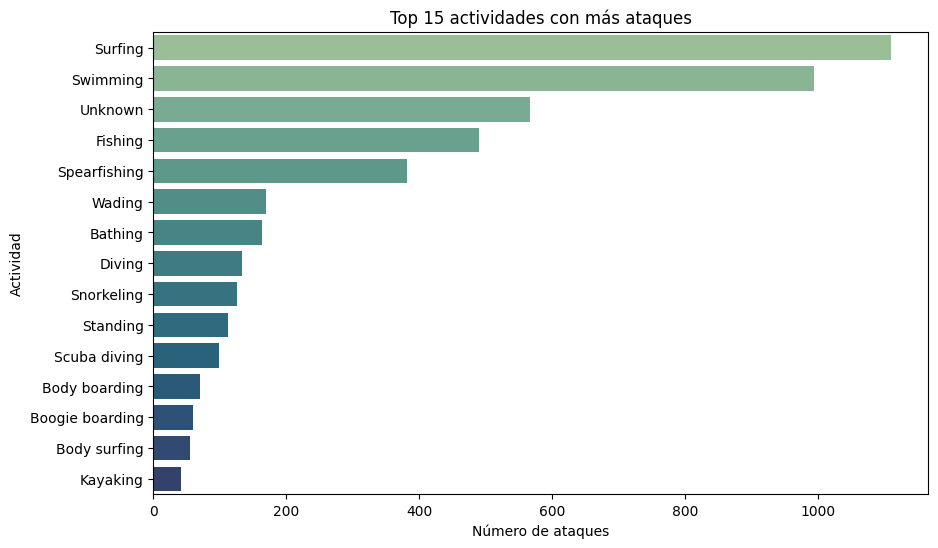


Top 10 actividades con más ataques:
activity
Surfing            1111
Swimming            994
Unknown             567
Fishing             490
Spearfishing        382
Wading              169
Bathing             163
Diving              133
Snorkeling          126
Standing            113
Scuba diving         98
Body boarding        70
Boogie boarding      59
Body surfing         55
Kayaking             41
Name: count, dtype: int64


In [19]:
# Hipótesis 2: El surf y la natación muestran mayor incidencia.

top_actividades = df['activity'].value_counts().head(15)

plt.figure(figsize=(10,6))
sns.barplot(y=top_actividades.index, x=top_actividades.values, palette='crest')
plt.title('Top 15 actividades con más ataques')
plt.xlabel('Número de ataques')
plt.ylabel('Actividad')
plt.show()

print("\nTop 10 actividades con más ataques:")
print(top_actividades)

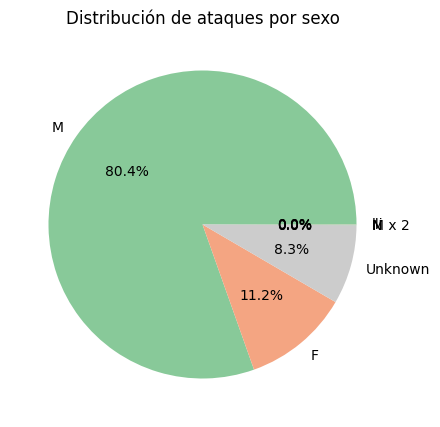


Distribución por sexo (%):
sex
M          80.43
F          11.17
Unknown     8.33
N           0.03
.           0.01
M x 2       0.01
lli         0.01
Name: proportion, dtype: float64


In [20]:
# Hipótesis 3: Los ataques afectan mayoritariamente a hombres.

plt.figure(figsize=(6,5))
df['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#88c999', '#f4a582', '#cccccc'])
plt.title('Distribución de ataques por sexo')
plt.ylabel('')
plt.show()

print("\nDistribución por sexo (%):")
print(round(df['sex'].value_counts(normalize=True)*100, 2))

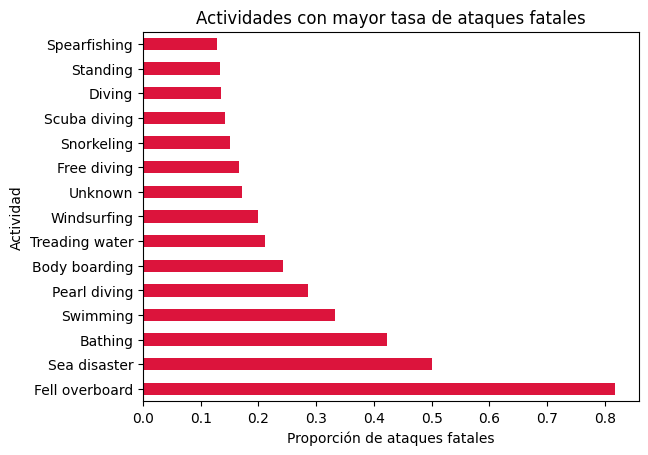

In [24]:
# Hipótesis 4: Buceo y pesca submarina tienen mayor tasa de mortalidad.

# Proporción de ataques fatales por actividad
mortalidad = (df[df['fatal_y_n'] == 'Fatal']['activity'].value_counts() /
              df['activity'].value_counts()).dropna()

# Filtrar actividades con al menos 10 casos
mortalidad = mortalidad[df['activity'].value_counts() >= 10]

# Graficar top 15
mortalidad.nlargest(15).plot(kind='barh', color='crimson')
plt.title('Actividades con mayor tasa de ataques fatales')
plt.xlabel('Proporción de ataques fatales')
plt.ylabel('Actividad')
plt.show()


In [ ]:
# Hipótesis 5: En Australia los ataques fatales son más frecuentes.

fatal_por_pais = (
    df.groupby('country')['fatal_y_n']
      .value_counts(normalize=True)
      .unstack()
      .fillna(0)
      .sort_values('Fatal', ascending=False)
)

# Mostrar top 10 países por tasa de fatalidad
plt.figure(figsize=(10,6))
fatal_por_pais['Fatal'].head(10).plot(kind='barh', color='tomato')
plt.title('Países con mayor proporción de ataques fatales')
plt.xlabel('Proporción de ataques fatales')
plt.ylabel('País')
plt.show()

print("\nTop 10 países con mayor tasa de ataques fatales:")

KeyError: 'Fatal'